In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from os.path import join
import matplotlib.pyplot as plt
base_dir = os.getcwd()
results_dir = join(base_dir, 'results')
plt.style.use('ggplot')

# Case Control study

In [62]:
df_cc = pd.read_csv(join(results_dir, 'case_control_OR1_5.txt'), sep=' ', )

In [63]:
df_cc

,OR_all,z,includes_1,width_CI_subs,pval_subs
0,1.971397,0.06136,0,1.65846,0.003230
1,1.372811,0.23009,1,1.42191,0.117187
2,1.651455,0.37780,1,1.30471,0.094910
3,1.692224,0.19392,0,1.41642,0.038431
4,1.829825,0.10767,0,1.65509,0.004279
...,...,...,...,...,...
95,1.638268,0.43941,1,1.26796,0.099155
96,1.497576,0.23273,0,1.46274,0.044257
97,1.527200,0.30203,0,1.52768,0.030372
98,2.236940,0.28487,0,2.02591,0.000061


Fraction of OR of 1 included:  0.17


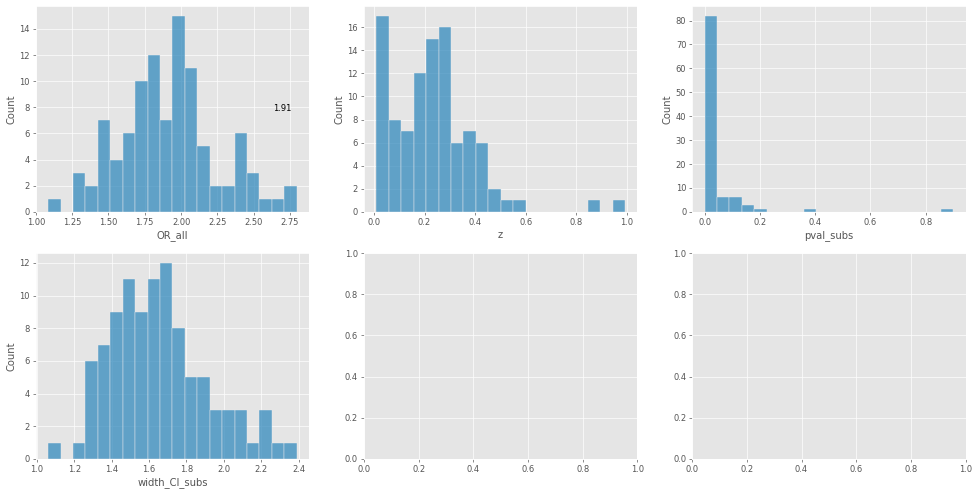

In [70]:
plt.rcParams["figure.dpi"] = 60
fig, ax = plt.subplots(2,3, figsize=(20,10))
ax = ax.flatten()
sns.histplot(df_cc.OR_all, bins=20, ax=ax[0])
ax[0].text(0.9, 0.5,str(round(df_cc.OR_all.mean(), 2)),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax[0].transAxes)
sns.histplot(df_cc.z, bins=20, ax=ax[1])
sns.histplot(df_cc.pval_subs, bins=20, ax=ax[2])
sns.histplot(df_cc.width_CI_subs, bins=20, ax=ax[3])

print("Fraction of OR of 1 included: ", df_cc.includes_1.sum()/len(df_cc))

In [14]:
x = np.linspace(0,10,20)
x_int = np.linspace(0,10.1,5)
be = np.histogram_bin_edges(x, 5)
np.array_split(x, [0,1,2])

[array([], dtype=float64),
 array([0.]),
 array([0.52631579]),
 array([ 1.05263158,  1.57894737,  2.10526316,  2.63157895,  3.15789474,
         3.68421053,  4.21052632,  4.73684211,  5.26315789,  5.78947368,
         6.31578947,  6.84210526,  7.36842105,  7.89473684,  8.42105263,
         8.94736842,  9.47368421, 10.        ])]

In [15]:
differences = (x.reshape(1,-1) - x_int.reshape(-1,1))
indices = np.abs(differences).argmin(axis=0)
residual = np.diagonal(differences[indices,])

In [28]:
x = np.array([])
inds = np.argsort(x)
x = x[inds]
x_int = np.array([1, 2, 3, 4])
split_indices = np.searchsorted(x, x_int)

In [38]:
ls_of_arrays = np.array_split(x, split_indices)
stds = np.array([np.std(e) for e in ls_of_arrays])

In [74]:
import numpy as np
x = np.array([0, 0.11, 0.1, 0.01, 0.2, 0.22, 0.23])
y = np.array([1, 2, 3, 2, 2, 2.1, 2.2])
num_intervals = 3
#sort the arrays
sort_inds = np.argsort(x)
x = x[sort_inds]
y = y[sort_inds]
# create intervals
x_range = x.max() - x.min()
x_intervals = np.linspace(np.min(x)+x_range/num_intervals, x.max()-x_range/num_intervals, num_intervals)
print(x_intervals)

[0.07666667 0.115      0.15333333]


In [76]:
# get indices of x where the elements of x_intervals 
# should be inserted, in order to maintain the order  
# for sufficiently large num_intervals it 
# approximates the closest value in x to an element 
# in x_intervals
split_indices = np.unique(np.searchsorted(x, x_intervals, side='left'))
ls_of_arrays_x = np.array_split(x, split_indices)
ls_of_arrays_y = np.array_split(y, split_indices)
print(x_intervals)
print(ls_of_arrays_x)
print(ls_of_arrays_y)


[0.07666667 0.115      0.15333333]
[array([0.  , 0.01]), array([0.1 , 0.11]), array([0.2 , 0.22, 0.23])]
[array([1., 2.]), array([3., 2.]), array([2. , 2.1, 2.2])]


In [78]:
y_stds = np.array([np.std(yi) for yi in ls_of_arrays_y])
x_mean = np.array([np.mean(xi) for xi in ls_of_arrays_x])
print(x_mean)
print(y_stds)

[0.005      0.105      0.21666667]
[0.5        0.5        0.08164966]
